In [15]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
class KeemPlot:
    def __init__(self, path, max_value=4095, threshold=500):
        self._max_value = max_value
        self._threshold = threshold / max_value
        self.Raw_Arrays = self._gen_raw_arrays(path)
        self.flatdata, self.flatdata_ut, self.barcodes = self._get_codes(self.Raw_Arrays)

    def _gen_raw_arrays(self, path):
        image_names = os.listdir(path)
        Raw_Images = []
        for i, name in enumerate(image_names):
            Raw_Images.append(io.imread(path+name)[0,:,:])

        return Raw_Images
    
    def _interp1d(self, array, new_len):
        la = len(array)
        return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)
    
    def _get_codes(self, Raw_data):

        flatdata = []
        flatdata_ut = []
        barcodes = []

        for i, image in enumerate(Raw_data):
            arr = image.max(axis=0)                       # Collapse 2d image into vector based on max value in each column
            arr = arr/self._max_value                     # Normalize to values between 0 and 1.
            arr_int = self._interp1d(arr, 10000)          # Interpolate the vector into 10000 values.
            flatdata_ut.append(np.copy(arr_int))          # Append unthresholded arrays
            arr_int[arr_int < self._threshold] = 0        # Threshold out noise/unwanted dim signal.
            flatdata.append(np.copy(arr_int))
            barcodes.append(np.vstack([arr_int for k in range(500)]))
            
        return flatdata, flatdata_ut, barcodes
    
    def plot_barcodes(self, barcodes, save=None):

        fig, axes = plt.subplots(len(barcodes), 1)


        for i, bar in enumerate(barcodes):
            axes[i].imshow(bar, cmap="Greys_r", vmin = 0, vmax=1.0)
            axes[i].axis("off")

        fig.tight_layout(pad=0)
        
        
        if save is not None:
            fig.savefig(save, dpi=1200)


In [39]:
data = KeemPlot("./data/JUB66_RFP/", max_value=65535)

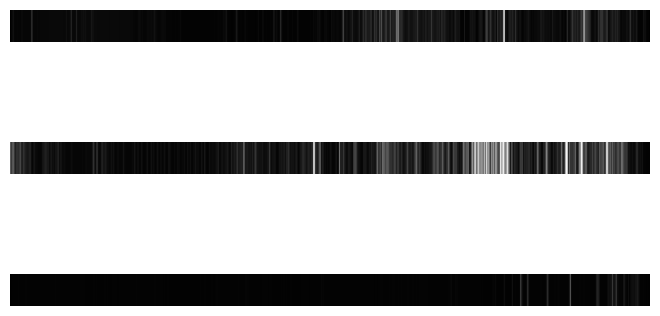

In [40]:
data.plot_barcodes(data.barcodes)